In [1]:
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedShuffleSplit,StratifiedKFold,RepeatedStratifiedKFold,RandomizedSearchCV,validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,chi2,RFE,SelectFromModel,RFECV
from sklearn.metrics import f1_score,classification_report,confusion_matrix,accuracy_score,roc_curve,precision_score,recall_score,roc_auc_score,log_loss
from sklearn.decomposition import PCA
from sklearn.svm import SVC

In [2]:
import pandas as pd

df = pd.read_csv('Framingham.csv')



In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [5]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

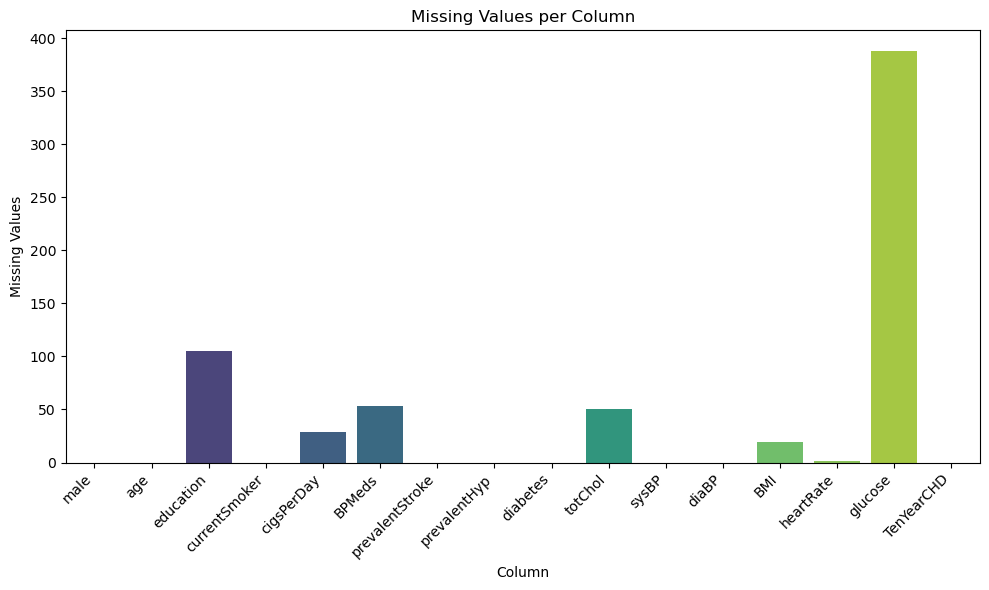

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data provided for missing values
missing_data = {
    'male': 0,
    'age': 0,
    'education': 105,
    'currentSmoker': 0,
    'cigsPerDay': 29,
    'BPMeds': 53,
    'prevalentStroke': 0,
    'prevalentHyp': 0,
    'diabetes': 0,
    'totChol': 50,
    'sysBP': 0,
    'diaBP': 0,
    'BMI': 19,
    'heartRate': 1,
    'glucose': 388,
    'TenYearCHD': 0
}

# Convert to a DataFrame for visualization
missing_df = pd.DataFrame(list(missing_data.items()), columns=['Column', 'Missing Values'])

# Bar plot to visualize the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Missing Values', data=missing_df, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Missing Values per Column')
plt.tight_layout()
plt.show()

In [7]:
(df.isnull().sum()/len(df))*100

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

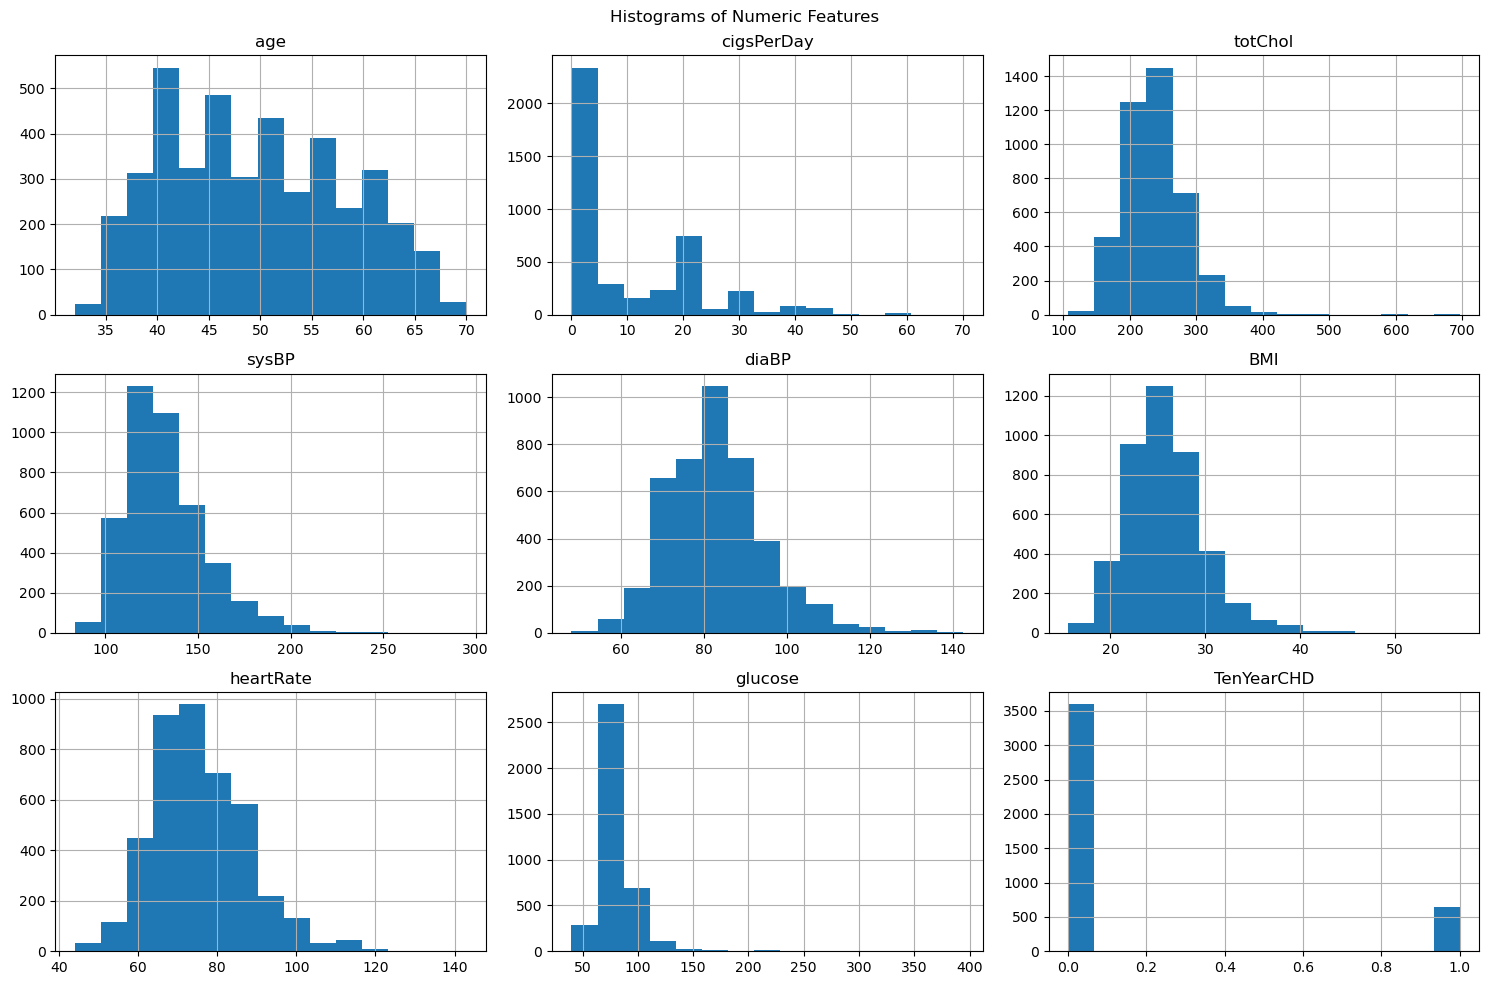

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your dataset
# List of numeric columns to visualize
numeric_columns = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD',]

# Create histograms for each numeric column
df[numeric_columns].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Histograms of Numeric Features')
plt.tight_layout()
plt.show()

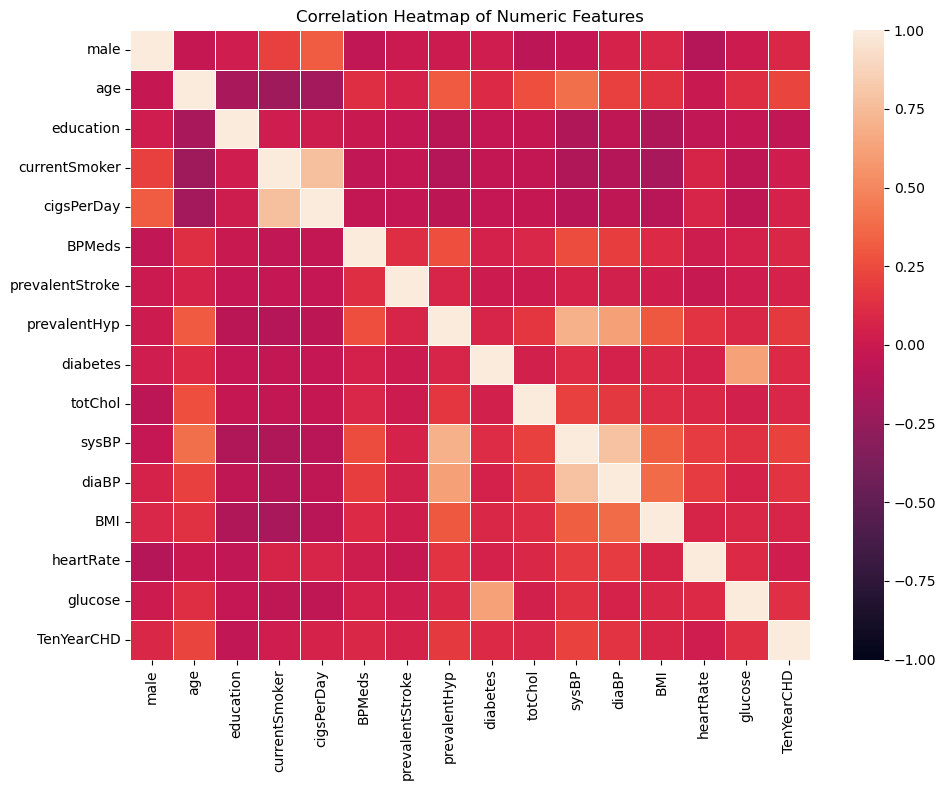

In [9]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

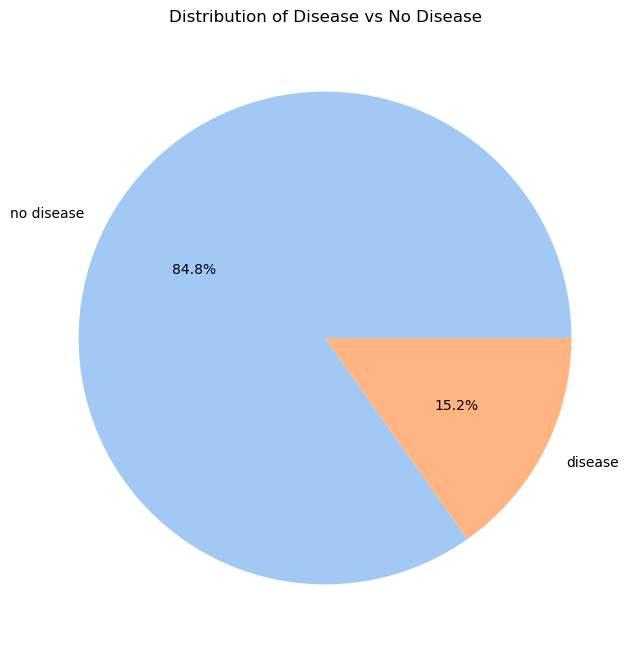

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Rename target values
target = df['TenYearCHD'].replace({1: 'disease', 0: 'no disease'},inplace=False)

# Generate a breakdown of the target column as a pie chart
target_distribution = target.value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_distribution, labels=target_distribution.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Disease vs No Disease')
plt.show()

In [11]:
df = df.dropna()
df.isna().sum()


male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [12]:
!pip install lightgbm


In [16]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Split df into X (features) and y (target)
x = df.drop(columns='TenYearCHD')  # Drop the target column to create the features DataFrame
y = df['TenYearCHD']  # Extract the target column

# Display the shape of X and y to confirm the split
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Scale the data to improve convergence for logistic regression
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply Univariate Feature Selection methods
chi_selector = SelectKBest(score_func=chi2, k='all')  # Keep all since we only have 15 features
chi_selector.fit(x, y)
chi_support = chi_selector.get_support()

anova_selector = SelectKBest(score_func=f_classif, k='all')
anova_selector.fit(x, y)
anova_support = anova_selector.get_support()

mutual_info_selector = SelectKBest(score_func=mutual_info_classif, k='all')
mutual_info_selector.fit(x, y)
mutual_info_support = mutual_info_selector.get_support()

# Logistic Regression Selector with scaled data
embeded_lr_selector = SelectFromModel(LogisticRegression(max_iter=1000, solver='lbfgs'), max_features=15)
embeded_lr_selector.fit(x_scaled, y)
embeded_lr_support = embeded_lr_selector.get_support()

# Random Forest Selector
embeded_rf_selector = SelectFromModel(RandomForestClassifier(), max_features=15)
embeded_rf_selector.fit(x, y)
embeded_rf_support = embeded_rf_selector.get_support()

# XGBoost Selector
embeded_xgb_selector = SelectFromModel(XGBClassifier(), max_features=15)
embeded_xgb_selector.fit(x, y)
embeded_xgb_support = embeded_xgb_selector.get_support()

# LightGBM Selector with suppressed verbosity
embeded_lgb_selector = SelectFromModel(LGBMClassifier(verbose=-1), max_features=15)
embeded_lgb_selector.fit(x, y)
embeded_lgb_support = embeded_lgb_selector.get_support()

# Recursive Feature Elimination (RFE) with scaled data
rfe_selector = RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=15)
rfe_selector.fit(x_scaled, y)
rfe_support = rfe_selector.get_support()

# Create a DataFrame to compile feature selection results
feature_name = x.columns
feature_selection_df = pd.DataFrame({
    'Feature': feature_name,
    'Chi-Squared': chi_support,
    'ANOVA': anova_support,
    'Mutual Info': mutual_info_support,
    'Logistic Regression': embeded_lr_support,
    'Random Forest': embeded_rf_support,
    'XGB': embeded_xgb_support,
    'LGB': embeded_lgb_support,
    'RFE': rfe_support
})

# Count the number of times a feature is selected
feature_selection_df['Total Selected'] = np.sum(feature_selection_df.iloc[:, 1:], axis=1)

# Sort the DataFrame based on the number of times a feature is selected
feature_selection_df = feature_selection_df.sort_values(by='Total Selected', ascending=False)

# Display the feature selection DataFrame
feature_selection_df.head()

Shape of X: (3658, 15)
Shape of y: (3658,)


,Feature,Chi-Squared,ANOVA,Mutual Info,Logistic Regression,Random Forest,XGB,LGB,RFE,Total Selected
1,age,True,True,True,True,True,True,True,True,8
10,sysBP,True,True,True,True,True,True,True,True,8
14,glucose,True,True,True,True,True,False,True,True,7
0,male,True,True,True,True,False,True,False,True,6
4,cigsPerDay,True,True,True,True,False,True,False,True,6


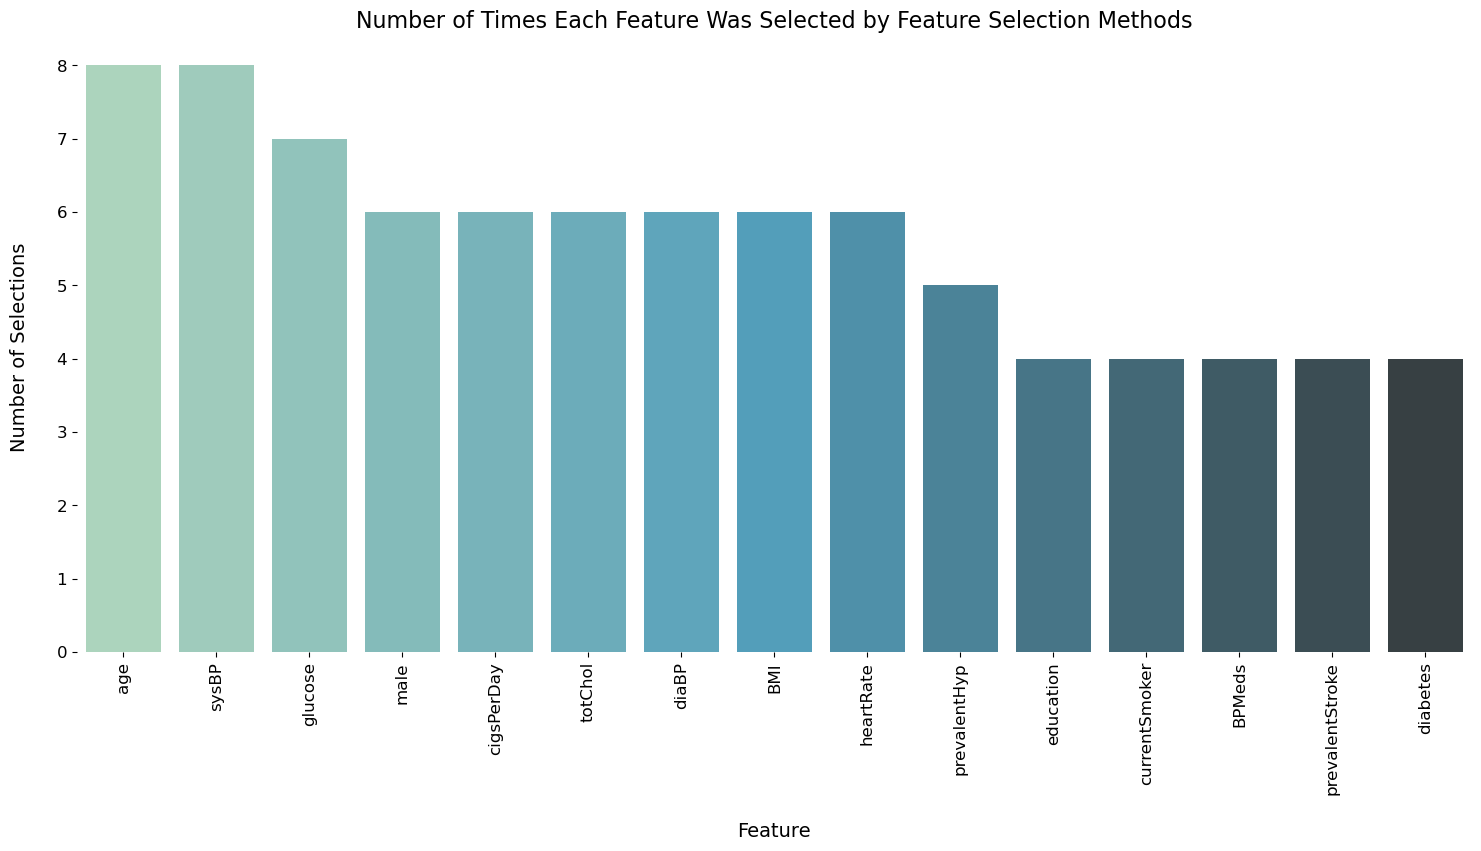

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sort the DataFrame by 'Total Selected' to display the most frequently selected features
feature_selection_df_sorted = feature_selection_df.sort_values(by='Total Selected', ascending=False)

# Plot the number of times each feature was selected
plt.figure(figsize=(18, 8))
sns.barplot(x='Feature', y='Total Selected', data=feature_selection_df_sorted, palette='GnBu_d')
plt.title('Number of Times Each Feature Was Selected by Feature Selection Methods', fontsize=16)
plt.xlabel('\nFeature', fontsize=14)
plt.ylabel('Number of Selections \n', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.box(False)
plt.show()

In [46]:
# Select the top 8 features based on the 'Total Selected' column
top_10_features = feature_selection_df.sort_values(by='Total Selected', ascending=False).head(10)['Feature'].tolist()

# Create a new DataFrame with only the top 8 selected features
ndf = x[top_10_features].copy()

# Display the new DataFrame
print("Top 10 selected features:", top_10_features)
ndf.head()

Top 10 selected features: ['age', 'sysBP', 'glucose', 'male', 'cigsPerDay', 'totChol', 'diaBP', 'BMI', 'heartRate', 'prevalentHyp']


,age,sysBP,glucose,male,cigsPerDay,totChol,diaBP,BMI,heartRate,prevalentHyp
0,39,106.0,77.0,1,0.0,195.0,70.0,26.97,80.0,0
1,46,121.0,76.0,0,0.0,250.0,81.0,28.73,95.0,0
2,48,127.5,70.0,1,20.0,245.0,80.0,25.34,75.0,0
3,61,150.0,103.0,0,30.0,225.0,95.0,28.58,65.0,1
4,46,130.0,85.0,0,23.0,285.0,84.0,23.10,85.0,0


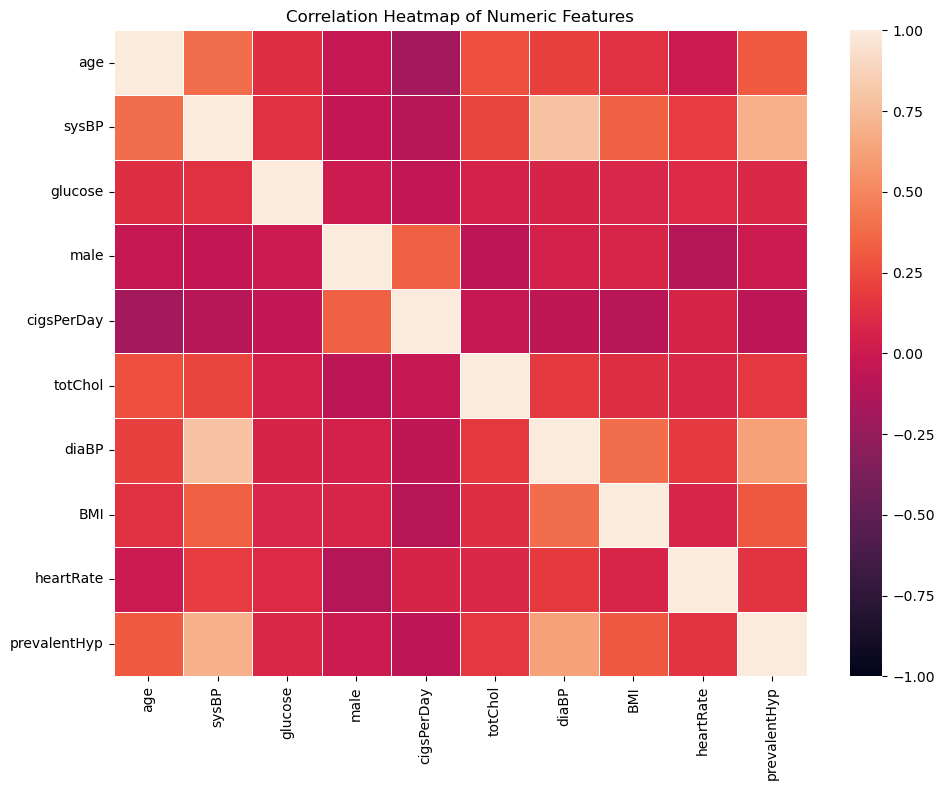

In [47]:
# Calculate correlation matrix
corr_matrix = ndf.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix,vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

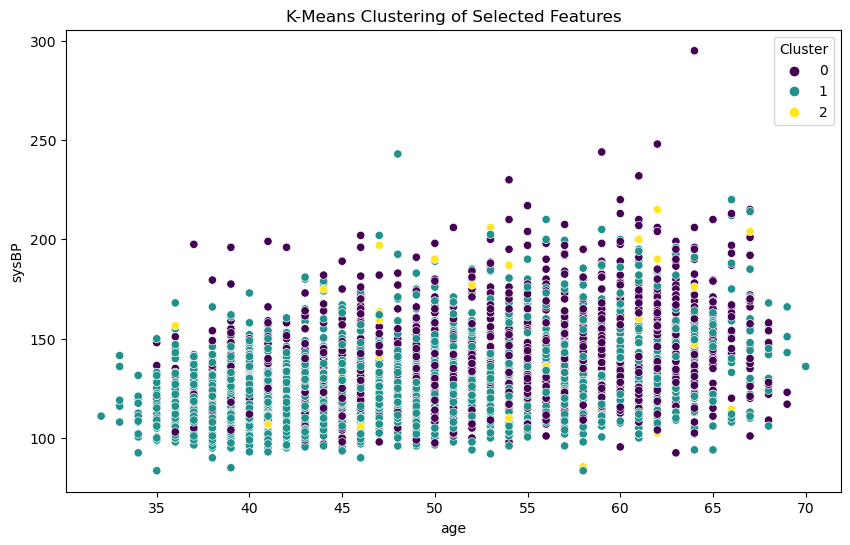

In [48]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a temporary copy of ndf to avoid modifying the original DataFrame
ndf_temp = ndf.copy()

# Fit the K-Means model on the temporary DataFrame with an appropriate number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
ndf_temp['Cluster'] = kmeans.fit_predict(ndf_temp)

# Visualize the clusters using the first two features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ndf_temp, x=ndf_temp.columns[0], y=ndf_temp.columns[1], hue='Cluster', palette='viridis')
plt.title('K-Means Clustering of Selected Features')
plt.xlabel(ndf_temp.columns[0])
plt.ylabel(ndf_temp.columns[1])
plt.show()

In [49]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate the silhouette score directly using ndf_temp
silhouette_avg = silhouette_score(ndf_temp.drop('Cluster', axis=1), ndf_temp['Cluster'])
print("Silhouette Score:", silhouette_avg)

# Calculate the Davies-Bouldin Index directly using ndf_temp
db_index = davies_bouldin_score(ndf_temp.drop('Cluster', axis=1), ndf_temp['Cluster'])
print("Davies-Bouldin Index:", db_index)

Silhouette Score: 0.3283065485543044
Davies-Bouldin Index: 0.9941923578963913


In [50]:
ndf.dropna(inplace = True)

In [53]:
# Add the target column y back to ndf
ndf['TenYearCHD'] = y

# Display the first few rows of ndf to confirm the addition
ndf.isnull().sum()


ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3658 non-null   int64  
 1   sysBP         3658 non-null   float64
 2   glucose       3658 non-null   float64
 3   male          3658 non-null   int64  
 4   cigsPerDay    3658 non-null   float64
 5   totChol       3658 non-null   float64
 6   diaBP         3658 non-null   float64
 7   BMI           3658 non-null   float64
 8   heartRate     3658 non-null   float64
 9   prevalentHyp  3658 non-null   int64  
 10  TenYearCHD    3658 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 472.0 KB


In [62]:
!pip install scikit-learn==1.2.2
!pip install imbalanced-learn==0.10.1

  Obtaining dependency information for scikit-learn==1.2.2 from https://files.pythonhosted.org/packages/27/4a/1afe473760b07663710a75437b795ef37362aebb8bf513ff3bbf78fbd0c6/scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata
  Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.2.2-cp311-cp311-macosx_10_9_x86_64.whl (9.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
feature-engine 1.8.1 requires scikit-learn>=1.4.0, but you have scikit-learn 1.2.2 which is incompatible.


In [69]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Step 1: Split ndf into X (features) and y (target)
X = ndf.drop('TenYearCHD', axis=1)
y = ndf['TenYearCHD']

# Step 2: Split the data into training and testing sets without undersampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Define the models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naïve Bayes': GaussianNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'k-NN': KNeighborsClassifier(n_neighbors=5),
    'Perceptron': Perceptron(max_iter=1000, random_state=42)
}


results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Get classification report as a dictionary
    report = classification_report(y_test, y_pred, target_names=['No Disease', 'Disease'], output_dict=True)
    
    # Append detailed scores to results for each model
    results.append({
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision (No Disease)': report['No Disease']['precision'],
        'Recall (No Disease)': report['No Disease']['recall'],
        'F1 Score (No Disease)': report['No Disease']['f1-score'],
        'Precision (Disease)': report['Disease']['precision'],
        'Recall (Disease)': report['Disease']['recall'],
        'F1 Score (Disease)': report['Disease']['f1-score']
    })

# Create a DataFrame to display results
results_df = pd.DataFrame(results)

# Display the detailed results
results_df.head()

,Model,Accuracy,Precision (No Disease),Recall (No Disease),F1 Score (No Disease),Precision (Disease),Recall (Disease),F1 Score (Disease)
0,Decision Tree,0.753188,0.854962,0.850325,0.852637,0.237569,0.244318,0.240896
1,Naïve Bayes,0.822404,0.875129,0.919740,0.896880,0.426357,0.312500,0.360656
2,Logistic Regression,0.851548,0.850416,0.998915,0.918703,0.933333,0.079545,0.146597
3,k-NN,0.827869,0.848053,0.968547,0.904304,0.355556,0.090909,0.144796
4,Perceptron,0.839709,0.840328,0.998915,0.912785,0.500000,0.005682,0.011236


In [70]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3658 entries, 0 to 4239
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3658 non-null   int64  
 1   sysBP         3658 non-null   float64
 2   glucose       3658 non-null   float64
 3   male          3658 non-null   int64  
 4   cigsPerDay    3658 non-null   float64
 5   totChol       3658 non-null   float64
 6   diaBP         3658 non-null   float64
 7   BMI           3658 non-null   float64
 8   heartRate     3658 non-null   float64
 9   prevalentHyp  3658 non-null   int64  
 10  TenYearCHD    3658 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 472.0 KB
